In [2]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread("image.png", cv2.IMREAD_COLOR)

# **Grayscale Image**

In [4]:
def gray(img, method='luminosity'):
    """
    Convert the image to grayscale using the specified method.

    Parameters:
    img (numpy.array): Input image array
    method (str, optional): Grayscale method ('luminosity', 'average', or 'lightness'). Defaults to 'luminosity'.

    Returns:
    numpy.array: Grayscale image
    """
    if method == 'average':
        return np.expand_dims(np.mean(img, axis=2), axis=2)
    elif method == 'lightness':
        return np.expand_dims((np.max(img, axis=2) + np.min(img, axis=2)) / 2, axis=2)
    else:  # default to luminosity
        return np.expand_dims(0.0722 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.2126 * img[:, :, 2], axis=2)

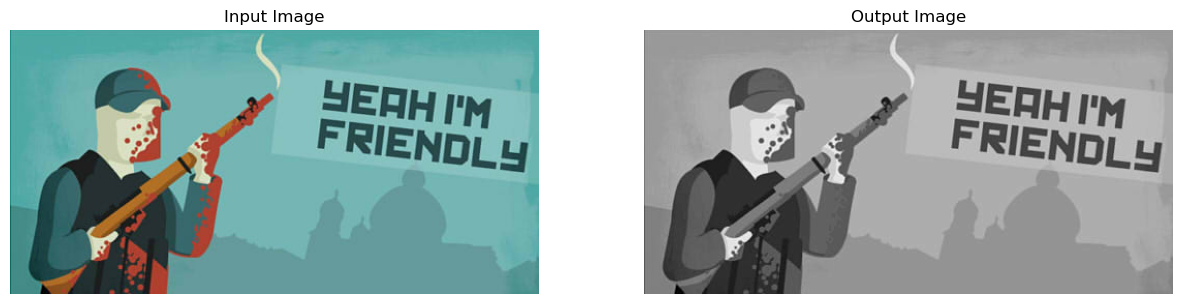

True

In [5]:
gray_image = gray(image)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Output Image')
plt.imshow(gray_image, cmap='gray')
plt.show()

cv2.imwrite('results/gray_image.png', gray_image)

# **Translate Image**

In [7]:
def translation(img, tr_factor):
    """
    Translate the image by a certain factor.

    Parameters:
    img (numpy.array): Input image array.
    tr_factor (int): Translation factor.

    Returns:
    numpy.array: Translated image.
    """
    h, w, c = img.shape
    temp = np.zeros([h, w, c], dtype='uint8')

    # Translation Matrix
    M = np.array([[1, 0, tr_factor], [0, 1, tr_factor]])

    for i in range(h):
        for j in range(w):

            new_xy = np.dot(M, [j, i, 1])
            new_x = new_xy[0]
            new_y = new_xy[1]

            if 0 < new_x < w and 0 < new_y < h:
                temp[new_y, new_x, :] = img[i, j, :]

    return temp

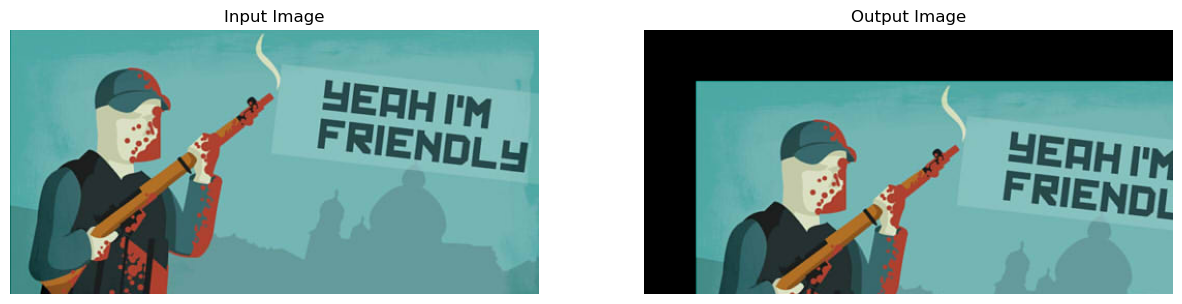

True

In [8]:
translate_image = translation(image, tr_factor=50)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Output Image')
plt.imshow(cv2.cvtColor(translate_image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('results/translate_image.png', gray_image)

# **Flipping Image**

In [9]:
def flip_vertical(img):
    h, w, c = img.shape
    temp = np.zeros([h, w, c], dtype='uint8')

    for i in range(h):
        start = 0
        end = w - 1
        while start < end:
            temp[i, start, :], temp[i, end, :] = img[i, end, :], img[i, start, :]
            start += 1
            end -= 1

    return temp

def flip_horizontal(img):
    """
    Flip the image horizontally.

    Parameters:
    img (numpy.array): Input image array.

    Returns:
    numpy.array: Horizontally flipped image.
    """
    h, w, c = img.shape
    temp = np.zeros([h, w, c], dtype='uint8')

    for i in range(w):
        start = 0
        end = h - 1
        while start < end:
            temp[start, i, :], temp[end, i, :] = img[end, i, :], img[start, i, :]
            start += 1
            end -= 1

    return temp

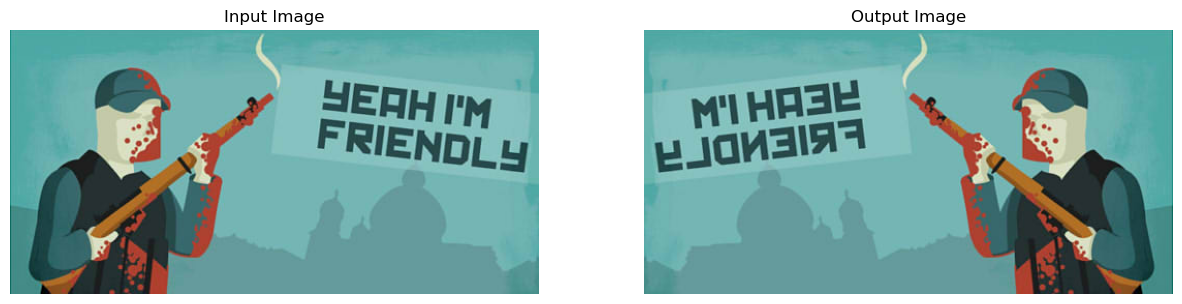

True

In [10]:
vertical_image = flip_vertical(image)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Output Image')
plt.imshow(cv2.cvtColor(vertical_image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('results/vertical_image.png', gray_image)

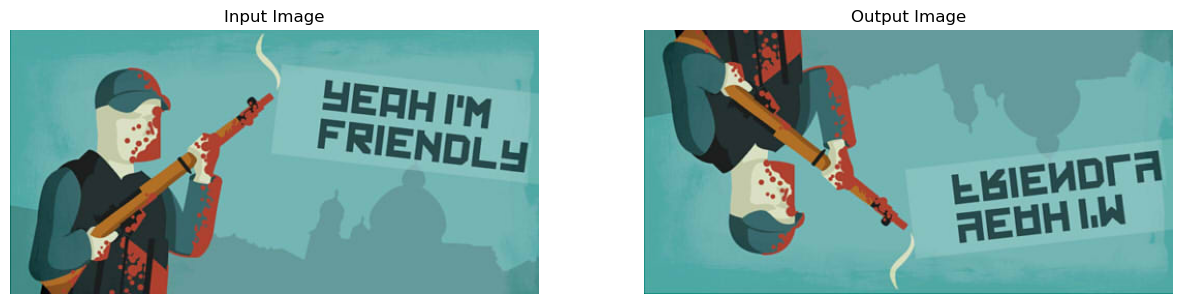

True

In [11]:
horizontal_image = flip_horizontal(image)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Output Image')
plt.imshow(cv2.cvtColor(horizontal_image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('results/horizontal_image.png', gray_image)

# **Scaling Image**

In [12]:
def nearest_neighbor_interpolate(img, x, y):
    """
    Interpolate the value at (x, y) using nearest neighbor method.

    Parameters:
    img (numpy.array): Input image array
    x (float): x-coordinate of the pixel to interpolate
    y (float): y-coordinate of the pixel to interpolate

    Returns:
    numpy.array: Interpolated pixel value
    """
    return img[int(round(y)), int(round(x)), :]

def bilinear_interpolate(img, x, y):
    """
    Interpolate the value at (x, y) using bilinear method.

    Parameters:
    img (numpy.array): Input image array
    x (float): x-coordinate of the pixel to interpolate
    y (float): y-coordinate of the pixel to interpolate

    Returns:
    numpy.array: Interpolated pixel value
    """
    h, w, _ = img.shape

    # constrain x and y to valid pixel coordinates
    x = np.clip(x, 0, w - 1)
    y = np.clip(y, 0, h - 1)

    x1, y1 = int(x), int(y)
    x2, y2 = min(x1 + 1, w - 1), min(y1 + 1, h - 1)

    # compute weights
    wa = (x2 - x) * (y2 - y)
    wb = (x2 - x) * (y - y1)
    wc = (x - x1) * (y2 - y)
    wd = (x - x1) * (y - y1)

    # compute interpolated pixel value
    result = (wa * img[y1, x1, :] +
              wb * img[y2, x1, :] +
              wc * img[y1, x2, :] +
              wd * img[y2, x2, :])

    return result


def scaling(img, new_w, new_h, interpolation='bilinear'):
    """
    Scale the image to a new size using the specified interpolation method.

    Parameters:
    img (numpy.array): Input image array
    new_w (int): Width of the scaled image
    new_h (int): Height of the scaled image
    interpolation (str, optional): Interpolation method ('bilinear' or 'nearest'). Defaults to 'bilinear'.

    Returns:
    numpy.array: Scaled image
    """
    h, w, c = img.shape
    temp = np.zeros([new_h, new_w, c], dtype='uint8')
    
    if new_w != 0:
        scale_w = w / new_w
    else:
        scale_w = 0
        
    if new_h != 0:
        scale_h = h / new_h
    else:
        scale_h = 0

    for i in range(new_h):
        for j in range(new_w):
            x, y = scale_w * j, scale_h * i
            
            if interpolation == 'nearest':
                temp[i, j, :] = nearest_neighbor_interpolate(img, x, y)
            else:  # default to bilinear
                temp[i, j, :] = bilinear_interpolate(img, x, y)
                
    return temp

In [13]:
scale_image = scaling(image, new_w=256, new_h=128)

print(f'Size of image before scaling: {image.shape[:2]} and after scaling: {scale_image.shape[:2]}')
cv2.imwrite('results/scale_image.png', gray_image)

Size of image before scaling: (256, 512) and after scaling: (128, 256)


True

# **Rotating Image**

In [14]:
def rotate(img, angle, interpolation='bilinear'):
    """
    Rotates the image by a specified angle in degrees.
    """
    h, w, _ = img.shape
    temp = np.zeros_like(img)

    # convert angle to radians
    angle_rad = np.deg2rad(angle)
    
    alpha = np.cos(angle_rad)
    beta = np.sin(angle_rad)
    
    cX, cY = w // 2, h // 2

    M = np.array([[alpha, beta, (1 - alpha) * cX - beta * cY], [-beta, alpha, beta * cX + (1 - alpha) * cY], [0, 0, 1]])

    for i in range(w):
        for j in range(h):
            new = np.dot(M, np.array([i, j, 1]))

            if 0 <= round(new[0]) < w and 0 <= round(new[1]) < h:
                if interpolation == 'nearest':
                    temp[j, i, :] = nearest_neighbor_interpolate(img, new[0], new[1])
                else:  # default to bilinear
                    temp[j, i, :] = bilinear_interpolate(img, new[0], new[1])

    return temp

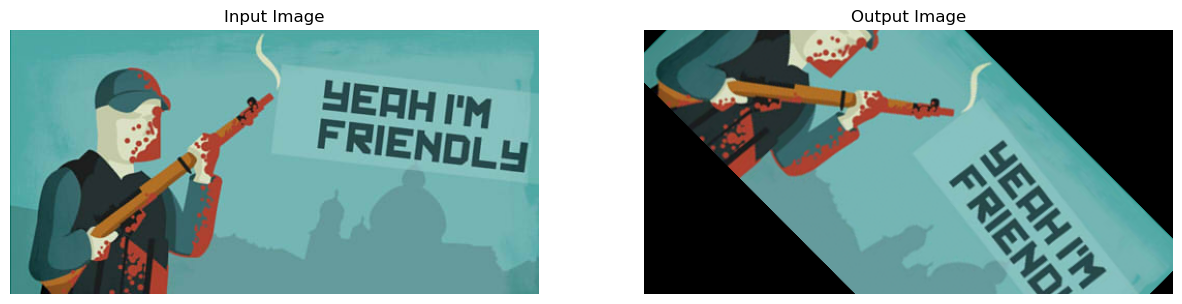

True

In [15]:
rotate_image = rotate(image, 45)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title('Output Image')
plt.imshow(cv2.cvtColor(rotate_image, cv2.COLOR_BGR2RGB))
plt.show()

cv2.imwrite('results/rotate_image.png', gray_image)